# Classificazione binaria con SVM support vector machines

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
import os
import joblib
from sklearn.svm import SVC
import sys
sys.path.append('../Scripts')
from utility import evaluate_and_save_model, plot_roc_curve

X_train = pd.read_csv("../data/splitted/X_train.csv")
X_test = pd.read_csv("../data/splitted/X_test.csv")
y_train = pd.read_csv("../data/splitted/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/splitted/y_test.csv").values.ravel()


# Rimozione colonne inutili o problematiche
X_train = X_train.drop(columns=['source'], errors='ignore')  # elimino colonna tutta NaN
X_train = X_train.loc[:, X_train.nunique() > 1]  # elimino colonne costanti

# Allineamento test set
X_test = X_test[X_train.columns]

# Riempio NaN residui con la mediana
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())

In [2]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
joblib.dump(scaler, "../models/scaler_svm.joblib")


['../models/scaler_svm.joblib']

Di default SVC non calcola la probabilità quindi per usare predict_proba al fine di calcolare la curva roc impostiamo il parametro probability=True dentro il modello quando lo istanziamo.

In [7]:
model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [4]:
evaluate_and_save_model(
    model,
    "SVM",
    y_train,
    y_pred_train,
    y_test,
    y_pred_test,
    "../results/classification_selfMade/SVM",
    "../models/svm_selfmade.joblib",
    {"kernel":"rbf","gamma":"scale","C":1.0}
)

# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel="rbf", class_weight="balanced", random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1]
}

grid_search = GridSearchCV(
    svc,
    param_grid,
    scoring='f1',
    refit='f1',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print("Migliori parametri trovati:", grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Migliori parametri trovati: {'C': 10, 'gamma': 1}


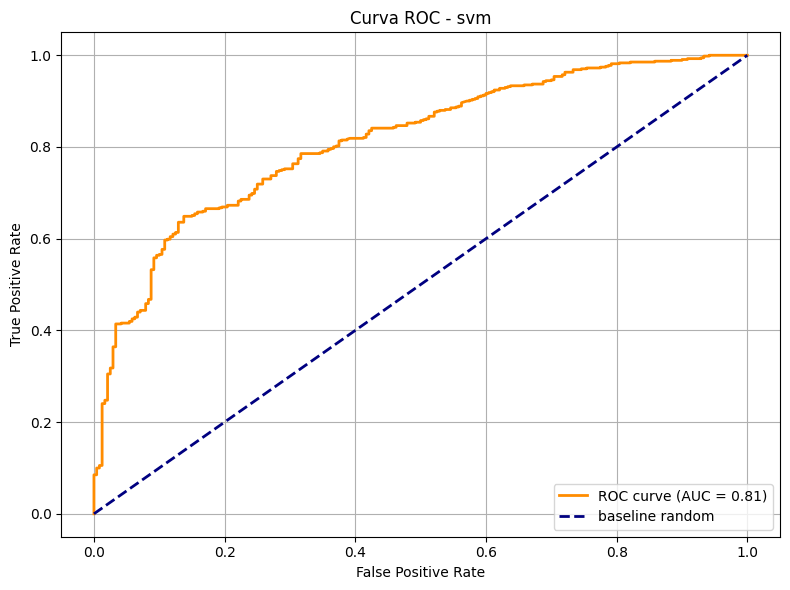

np.float64(0.8127580098582872)

In [8]:
plot_roc_curve(model, X_test_scaled, y_test, "svm",f"../results/classification_selfMade/roc")
